<h2>异常值处理</h2>

what are outliers?<br>
异常值是指样本中的个别值，其数据值明显偏离其余的观测值<br>
异常值的分析：可以使用3sigma原则或者箱行图分析<br>
异常值处理：通常选择删除或者修正填补

异常值过滤方法通过自定义函数的方式实现，常用的异常值过滤方法有3sigma、箱线图等。<br>

<h2>1 3sigma原则</h2>

3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过标准差3倍的值 → p(|x - μ| > 3σ) ≤ 0.003

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.DataFrame(np.random.randn(1000,2))

In [4]:
data

,0,1
0,0.481461,-0.449716
1,1.678820,-1.080899
2,-1.025467,-0.524137
3,-0.236352,0.387870
4,-2.156466,0.326286
...,...,...
995,-1.204587,-0.601120
996,0.384460,1.017983
997,0.111095,1.162660
998,-2.424598,-0.405415


In [5]:
test_data = data.iloc[:,0]

In [6]:
test_data

0      0.481461
1      1.678820
2     -1.025467
3     -0.236352
4     -2.156466
         ...   
995   -1.204587
996    0.384460
997    0.111095
998   -2.424598
999   -0.782525
Name: 0, Length: 1000, dtype: float64

In [9]:
u = test_data.mean()  # 计算均值
std = test_data.std()  # 计算标准差

In [10]:
u, std

(-0.009087918113278675, 1.0073703689401154)

scipy统计模块stats.kstest正态性检验<br>
参数：<br>
· 待检验的数据<br>
· 检验方法，这里我们设置为‘norm’，即正态性检验<br>
· (均值，标准差)<br>

In [12]:
stats.kstest(test_data, 'norm', (u, std))

KstestResult(statistic=0.02605238290866352, pvalue=0.49766078058629004)

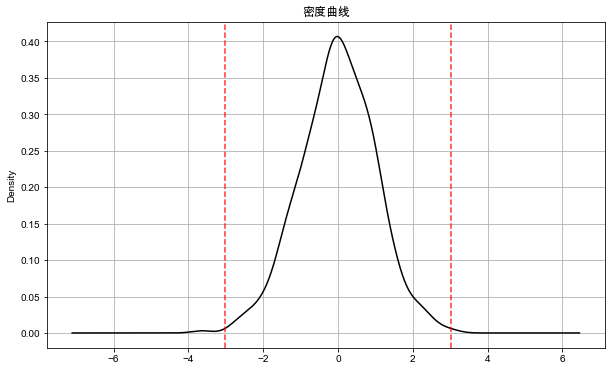

In [14]:
# 绘制数据密度曲线
fig = plt.figure(figsize = (10,6))
test_data.plot(kind = 'kde',grid = True,style = '-k',title = '密度曲线')
plt.axvline(3*std, color='r',linestyle="--",alpha=0.8) 
plt.axvline(-3*std, color='r',linestyle="--",alpha=0.8)

In [22]:
error = test_data[np.abs(test_data - u) > 3*std]
data_c = test_data[np.abs(test_data - u) <= 3*std]

In [23]:
len(error)

4

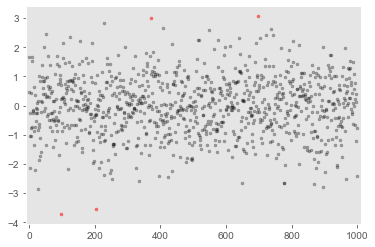

In [25]:
plt.scatter(data_c.index, data_c, color = 'k', marker='.', alpha = 0.3)
plt.scatter(error.index, error, color = 'r', marker='.', alpha = 0.5)
plt.xlim([-10,1010])
plt.grid()

利用3sigma原则一共选出来了4个异常值

<h2>2 箱形图</h2>

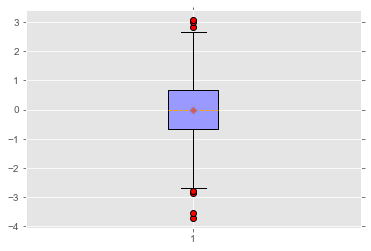

In [15]:
plt.style.use('ggplot')
plt.boxplot(test_data,  # 选择数据
            patch_artist=True,  # 上下四分位是否填充
            showmeans=True,  # 以点的形式显示均值
            boxprops={'color': 'black', 'facecolor': '#9999ff'},  # 设置箱体属性，填充色和边框色
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'color': 'black'},  # 设置异常值属性，点的形状、填充色和边框色
            meanprops={'marker': 'D', 'markerfacecolor': 'indianred'},  # 设置均值点的属性，点的形状、填充色
            medianprops={'linestyle': '--', 'color': 'orange'},  # 设置中位数线的属性，线的类型和颜色
            )

# 去除箱线图的上边框与右边框的刻度标签
plt.tick_params(top='off', right='off')

# 显示图形
plt.show()

In [16]:
s = test_data.describe()
s

count    1000.000000
mean       -0.009088
std         1.007370
min        -3.714609
25%        -0.673424
50%        -0.003627
75%         0.678208
max         3.065444
Name: 0, dtype: float64

In [17]:
type(s)

pandas.core.series.Series

In [18]:
q1 = s['25%']
q3 = s['75%']
iqr = q3 - q1
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr
print("第一四分位数：", q1)
print("第三四分位数：", q3)
print("四分位数之差：", iqr)
print("下限：", mi)
print("上限：", ma)

第一四分位数： -0.6734236150126514
第三四分位数： 0.678208398959447
四分位数之差： 1.3516320139720983
下限： -2.700871635970799
上限： 2.7056564199175943


异常值共7条


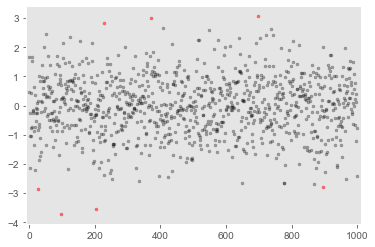

In [20]:
error = test_data[(test_data < mi) | (test_data > ma)]
data_c = test_data[(test_data >= mi) & (test_data <= ma)]
print('异常值共%i条' % len(error))  
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,1010])
plt.grid()

利用箱形图一共选出来了7个异常值